In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [4]:
# Check missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Overview
print(customers.describe())
print(products.describe())
print(transactions.describe())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08

In [5]:
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
print(region_sales.sort_values(ascending=False))


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [6]:
product_sales = transactions.groupby('ProductID')['TotalValue'].sum()
top_products = product_sales.sort_values(ascending=False).head(5)
print(top_products)


ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


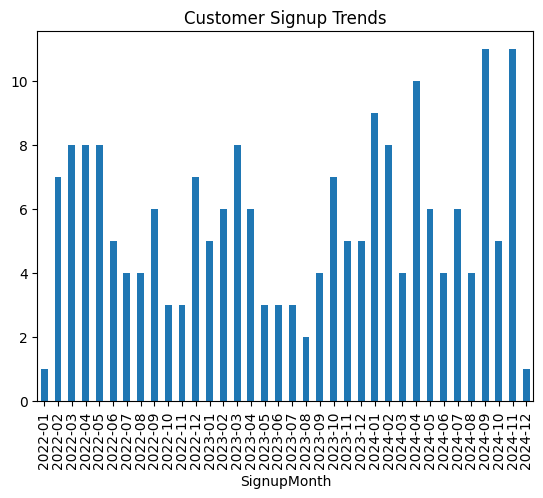

In [7]:
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth').size()
signup_trends.plot(kind='bar')
plt.title("Customer Signup Trends")
plt.show()


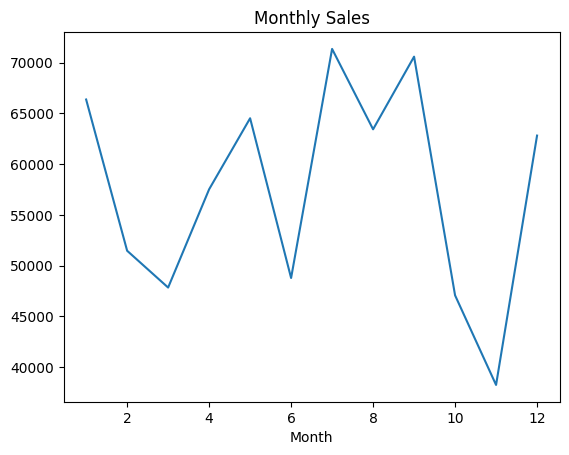

In [8]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line')
plt.title("Monthly Sales")
plt.show()


In [9]:
product_categories = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
print(product_categories.sort_values(ascending=False))


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
